In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import Perceptron
#from sklearn.linear_model import SGDClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
#from sklearn.naive_bayes import GaussianNB

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")



In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Description ##
survival:    Survival 
PassengerId: Unique Id of a passenger. 
pclass:    Ticket class     
sex:    Sex     
Age:    Age in years     
sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkationtrain_df.describe()

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total','%'])

In [6]:
print(percent_1)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [7]:
print(percent_2)

Cabin          77.1
Age            19.9
Embarked        0.2
Fare            0.0
Ticket          0.0
Parch           0.0
SibSp           0.0
Sex             0.0
Name            0.0
Pclass          0.0
Survived        0.0
PassengerId     0.0
dtype: float64


In [8]:
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [9]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## 1. Age and Sex: ##

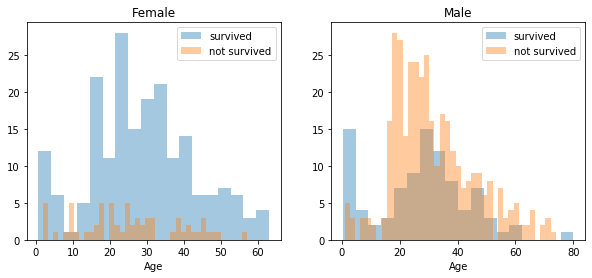

In [10]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[1], kde=False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False)
ax.legend()
_ = ax.set_title('Male')
#Also
# ax.set_title('Male')

## 3. Embarked, Pclass and Sex:

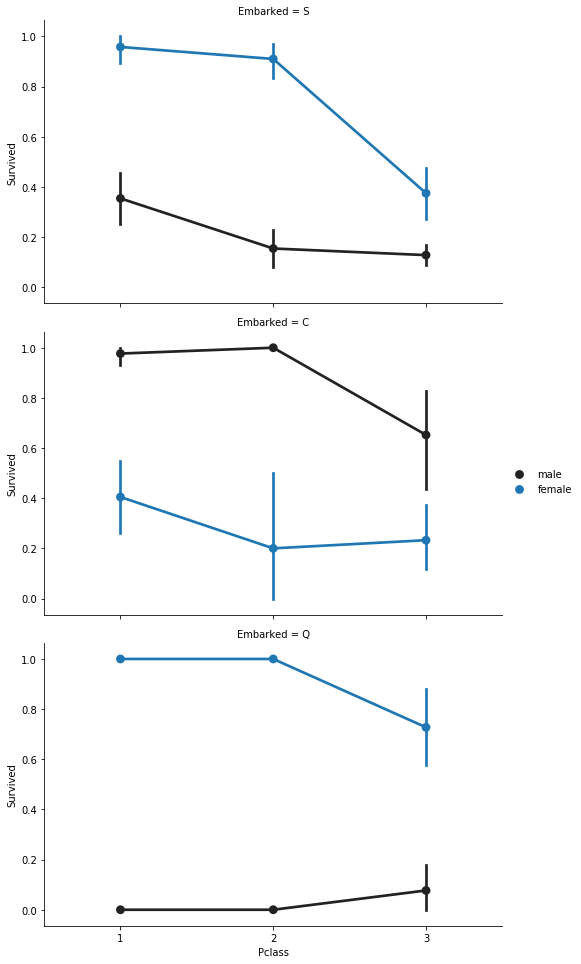

In [11]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height = 4.5, aspect = 1.6)

##/home/bhavesh/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
##  warnings.warn(msg, UserWarning)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = None, order = None, hue_order = None)
FacetGrid.add_legend()

In [ ]:
## 4. Pclass: ##

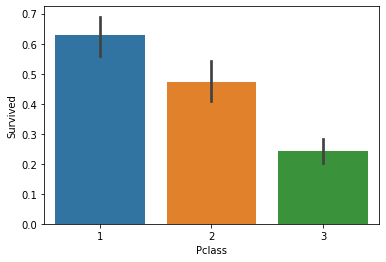

In [12]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train_df)

## 5. SibSp and Parch:
SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that sows if someone is not alone.

In [13]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives']>0, 'not_alone'] = 0
    dataset.loc[dataset['relatives']==0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
    
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/home/bhavesh/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


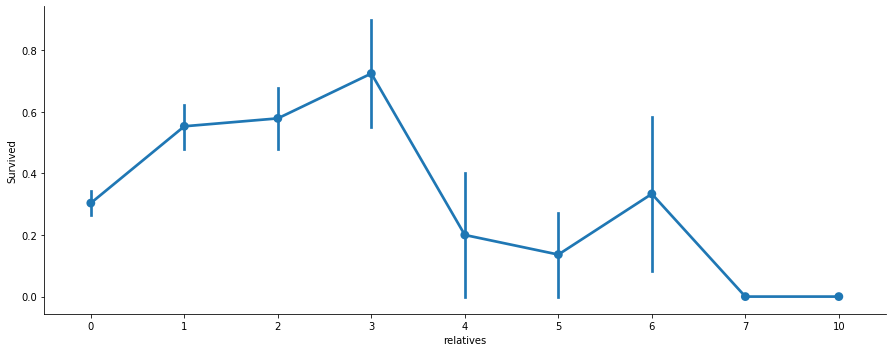

In [14]:
axes = sns.factorplot('relatives', 'Survived', data = train_df, aspect = 2.5,)

## /home/bhavesh/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
##  warnings.warn(msg)

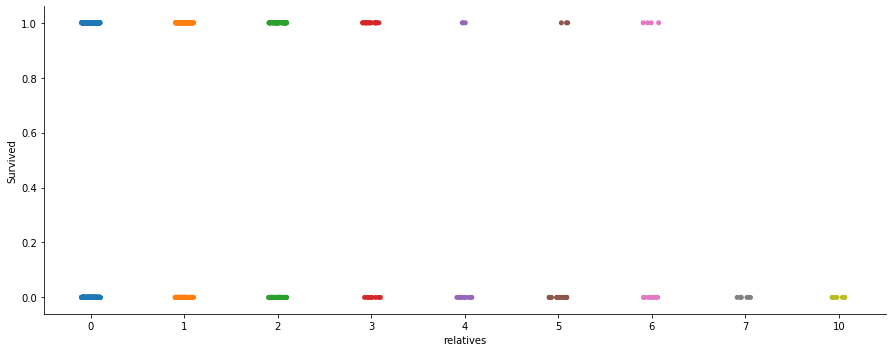

In [15]:
axes = sns.catplot('relatives', 'Survived', data = train_df, aspect = 2.5,)


## Data Preprocessing

First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability. I will not drop it from the test set, since it is required there for the submission.

In [16]:
train_df  = train_df.drop(['PassengerId'], axis = 1)

## Missing Data:

### Cabin:
As a reminder, we have to deal with Cabin (687), Embarked (2) and Age (177). First I thought, we have to delete the ‘Cabin’ variable but then I found something interesting. A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero. In the picture below you can see the actual decks of the titanic, ranging from A to G.

In [17]:
import re
deck  = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "U":8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck']  = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck']  = dataset['Deck'].map(deck)
    dataset['Deck']  = dataset['Deck'].fillna(0)
    dataset['Deck']  = dataset['Deck'].astype(int)
    
# we can now drop the cabin feature
train_df  = train_df.drop(['Cabin'], axis = 1)
test_df   = test_df.drop(['Cabin'], axis = 1)

## Age:
Now we can tackle the issue with the age features missing values. I will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

In [18]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
    

train_df["Age"].isnull().sum()


0

## Embarked:

Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

In [19]:
train_df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [20]:
common_value  = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

## Converting Features:

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int64
Deck         891 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


Above you can see that ‘Fare’ is a float and we have to deal with 4 categorical features: Name, Sex, Ticket and Embarked. Lets investigate and transfrom one after another.

### Fare:
Converting “Fare” from float to int64, using the “astype()” function pandas provides:

In [22]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

## Name:
We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [23]:
data = [train_df, test_df]
titles = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}

for dataset in data:
    # Extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace([['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                                  'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare'])
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df = train_df.drop(['Name'], axis = 1)
test_df  = test_df.drop(['Name'], axis = 1)


## /home/bhavesh/anaconda3/lib/python3.7/site-packages/pandas/core/missing.py:44: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
##  mask = arr == x

/home/bhavesh/anaconda3/lib/python3.7/site-packages/pandas/core/missing.py:44: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


## Sex:
Convert ‘Sex’ feature into numeric.

In [24]:
gender = {"male":0, "female":1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)

## Ticket:

In [25]:
train_df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [26]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

## Embarked:
Convert ‘Embarked’ feature into numeric.

In [27]:
ports = {'S':0, 'C':1, 'Q':1}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

## Creating Categories:

We will now create categories within the following features:

### Age:
Now we need to convert the ‘age’ feature. First we will convert it from float into integer. Then we will create the new ‘AgeGroup” variable, by categorizing every age into a group. Note that it is important to place attention on how you form these groups, since you don’t want for example that 80% of your data falls into group 1.

In [28]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()
#train_df['Age'].value_counts()

In [29]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1.0
1,1,1,1,5,1,0,71,1,1,0,3,3.0
2,1,3,1,3,0,0,7,0,0,1,8,2.0
3,1,1,1,5,1,0,53,0,1,0,3,3.0
4,0,3,0,5,0,0,8,0,0,1,8,1.0
5,0,3,0,4,0,0,8,1,0,1,8,1.0
6,0,1,0,6,0,0,51,0,0,1,5,1.0
7,0,3,0,0,3,1,21,0,4,0,8,4.0
8,1,3,1,3,0,2,11,0,2,0,8,3.0
9,1,2,1,1,1,0,30,1,1,0,8,3.0


## Fare:
For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. But it isn’t that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use sklearn “qcut()” function, that we can use to see, how we can form the categories.

In [30]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1.0
1,1,1,1,5,1,0,71,1,1,0,3,3.0
2,1,3,1,3,0,0,7,0,0,1,8,2.0
3,1,1,1,5,1,0,53,0,1,0,3,3.0
4,0,3,0,5,0,0,8,0,0,1,8,1.0
5,0,3,0,4,0,0,8,1,0,1,8,1.0
6,0,1,0,6,0,0,51,0,0,1,5,1.0
7,0,3,0,0,3,1,21,0,4,0,8,4.0
8,1,3,1,3,0,2,11,0,2,0,8,3.0
9,1,2,1,1,1,0,30,1,1,0,8,3.0


In [31]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

## Creating new Features

I will add two new features to the dataset, that I compute out of other features.

### 1. Age times Class

In [33]:
data = [train_df, test_df]

for dataset in data:
    dataset['Age_class'] = dataset['Age'] * dataset['Pclass']
    

### 2. Fare per Person

In [34]:
for dataset in data:
    dataset['Fare_per_person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_per_person'] = dataset['Fare_per_person'].astype(int)
    
# Let's take a last look at the training set, before we start training the models.
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_class,Fare_per_person
0,0,3,0,2,1,0,0,0,1,0,8,1.0,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3.0,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2.0,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3.0,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1.0,15,1
5,0,3,0,4,0,0,1,1,0,1,8,1.0,12,1
6,0,1,0,6,0,0,3,0,0,1,5,1.0,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4.0,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3.0,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3.0,2,1


## Building Machine Learning Models

Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other. Later on, we will use cross validation.

In [35]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test  = test_df.drop("PassengerId", axis=1).copy()

## Logistic Regression:

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train)*100,2)

## /home/bhavesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: 
## FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
## FutureWarning)

/home/bhavesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Linear Support Vector Machine:

In [37]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train)*100,2)

## /home/bhavesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: 
## ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
## "the number of iterations.", ConvergenceWarning)

/home/bhavesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Which is the best Model ?

In [39]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Support Vector Machines', 
              ],
    'Score': [acc_log, acc_linear_svc, ]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
83.61,Support Vector Machines
83.16,Logistic Regression
